In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funcoes import *
from funcoes import read_QE_band as readband
from wulffpack import SingleCrystal

# CsPbBr$_3$

In [2]:
bandas = readband(r'CsPbBr3/band-cspbbr3.gnu')
dos = pd.read_csv(r'CsPbBr3/dos_CsPbBr3.txt', sep = ' ')

In [3]:
DOS = dos['dos(E)']
E = dos['E(eV)']

In [4]:
indices = list(bandas['k'])
len(indices)

101

Band Gap = 1.6845999999999997 eV


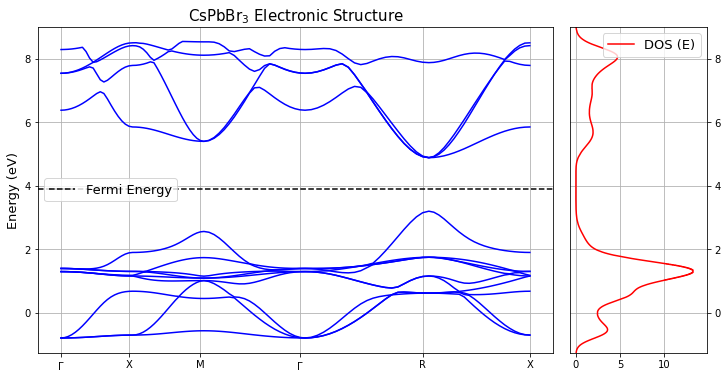

In [5]:
nbnd = len(bandas.keys())-1
k_nodes = [indices[0], indices[19], indices[39], indices[59], indices[79], indices[-1]]

fig, (ax, ax_dos) = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [3, 0.8]})

for i in range(13,nbnd):
    ax.plot(bandas['k'], bandas['e'+str(i)], c = 'blue', linewidth = 1.5)
    
#ax.plot(bandas['k'], bandas['e21'], c = 'red', linewidth = 1.5) #Valence band
#ax.plot(bandas['k'], bandas['e22'], c = 'red', linewidth = 1.5) # conduction band

# Band Gap:
bg = min(bandas['e22'])- max(bandas['e21'])
print('Band Gap =', bg, 'eV')
ax.set_xticks(k_nodes)
ax.set_xticklabels(["$\Gamma$","X","M", "$\Gamma$", 'R', 'X'])
ax.grid('--')
ax.set_title(r'CsPbBr$_3$ Electronic Structure', fontsize = 15)
ax.axhline(3.9128, linestyle = '--', color = '0', label = 'Fermi Energy')
ax.legend(loc = 'center left', fontsize = 13)
ax.set_ylabel('Energy (eV)', fontsize = 13)


ax_dos.plot(DOS, E, color='red', linewidth=1.5, label='DOS (E)')
ax_dos.yaxis.set_label_position("right")
ax_dos.set_ylim(ax.get_ylim())  
ax_dos.legend(loc='upper right', fontsize = 13)
ax_dos.grid('--')
ax_dos.yaxis.tick_right()
fig.subplots_adjust(wspace=0.05) 
plt.savefig('CsPbBr3/banda_CsPbBr3.png', dpi = 200)

In [6]:
df_001 = pd.read_csv('CsPbBr3/001.txt', sep = ' ')
df_110 = pd.read_csv('CsPbBr3/110.txt', sep = ' ')
df_111 = pd.read_csv('CsPbBr3/111.txt', sep = ' ')

E_bulk, E_slab, n_bulk, n_slab, A = df_001['Ebulk'][0], df_001['Et'], 5.0, df_001['Nat'], df_001['A']
df_001['Ess'] = single_surface(E_bulk, E_slab, n_bulk, n_slab, A)

E_bulk, E_slab, n_bulk, n_slab, A = df_110['Ebulk'][0], df_110['Et'], 5.0, df_110['Nat'], df_110['A']
df_110['Ess'] = single_surface(E_bulk, E_slab, n_bulk, n_slab, A)

E_bulk, E_slab, n_bulk, n_slab, A = df_111['Ebulk'][0], df_111['Et'], 5.0, df_111['Nat'], df_111['A']
df_111['Ess'] = single_surface(E_bulk, E_slab, n_bulk, n_slab, A)


In [7]:
df_001

,N,Et,Nat,A,Ebulk,Ess
0,2,-1899.839609,5,35.4,-1899.862275,0.069786
1,4,-3799.696164,10,35.4,NaN,0.087395
2,6,-5699.556155,15,35.4,NaN,0.094426
3,10,-9499.277559,25,35.4,NaN,0.104112


In [8]:
df_110

,N,Et,Nat,A,Ebulk,Ess
0,2,-1899.824715,5,50.063,-1899.862275,0.081771
1,6,-5699.515014,15,50.063,NaN,0.156339
2,8,-7599.360712,20,50.063,NaN,0.192430
3,10,-9499.208871,25,50.063,NaN,0.223161


In [9]:
df_111

,N,Et,Nat,A,Ebulk,Ess
0,2,-1899.790196,5,61.314,-1899.862275,0.128129
1,4,-3799.652426,10,61.314,NaN,0.128209
2,6,-5699.504449,15,61.314,NaN,0.146432
3,8,-7599.356941,20,61.314,NaN,0.163822
4,10,-9499.211628,25,61.314,NaN,0.177310


Text(0.5, 0.98, 'Surface energy and slab width')

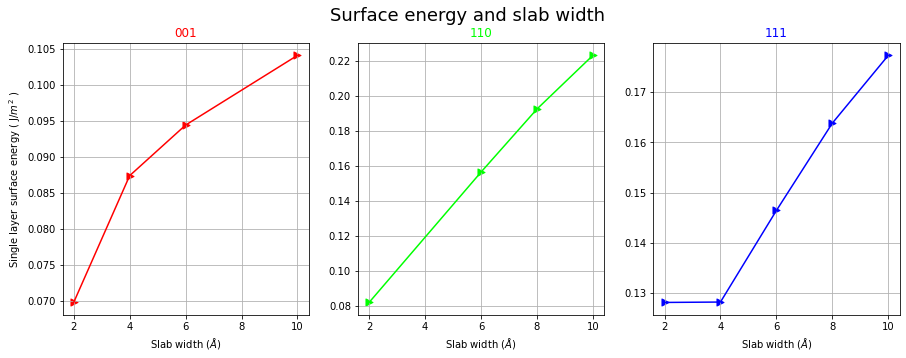

In [10]:
fig, [ax1,ax2,ax3] = plt.subplots(1, 3, figsize=(15, 5))
tabelas = [df_001, df_110, df_111]
pl = ['001', '110', '111']
colors = ['r', 'lime', 'b']
u = 0
for ax in [ax1,ax2,ax3]:
    
    ax.scatter(tabelas[u]['N'], tabelas[u]['Ess'], marker = '>', color = colors[u], s = 50)
    ax.plot(tabelas[u]['N'], tabelas[u]['Ess'], color = colors[u])
    ax.set_title(pl[u], c = colors[u], fontsize = 12)
    ax.set_xlabel(r'Slab width ($\AA$)')
    if u == 0:
        ax.set_ylabel(r'Single layer surface energy ( J/$m^2$ )')
    
    #ax.set_yscale('log')
    ax.grid('--')
    u+=1
plt.suptitle('Surface energy and slab width', fontsize=18)

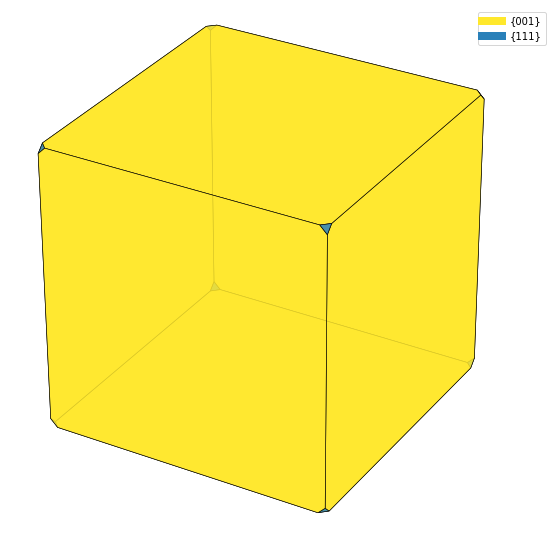

In [11]:
Es_001 = max(df_001['Ess'])
Es_110 = max(df_110['Ess'])
Es_111 = max(df_111['Ess'])

surface_energies = {(0,0,1): Es_001,
                    (1,1,0): Es_110,
                    (1,1,1): Es_111,}
vacuum_particle = SingleCrystal(surface_energies)
vacuum_particle.translate_particle([0,9,2])
continuous_colors = vacuum_particle.get_continuous_color_scheme()
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
vacuum_particle.make_plot(ax, colors = continuous_colors, linewidth =.6)
ax.legend()

## Surface energy calculations methodology

In [12]:
# Tests using 001-1-8 CsPbBr3 slab

E_BULK = -1899.86227463 # Ry
E_FROZEN = -7599.39907760 # Ry
E_RELAX = -7599.36055262 # Ry
E_Cs_RELAX = -7599.37559945 # Ry
E_Pb_RELAX = -7599.37874410 # Ry
n_SLAB = 20
n_BULK = 5
A = 35.4 # A²
t = 0.0001
STOP = 0.000265

### Sigle surface

In [13]:
E_s_SS = single_surface(E_BULK, E_RELAX, n_BULK, n_SLAB, A)
print("001 Surface energy:", E_s_SS, "J/m²")

001 Surface energy: 0.2726254769588399 J/m²


### Cleavage energy

In [14]:
E_Cs_CE, E_Pb_CE = cleavage_energy(E_BULK, E_FROZEN, E_Cs_RELAX, E_Pb_RELAX, n_SLAB, n_BULK, A)
print("001-Cs Surface energy:", E_Cs_CE, "J/m²")
print("001-Pb Surface energy:", E_Pb_CE, "J/m²")

001-Cs Surface energy: 0.2985848114566983 J/m²
001-Pb Surface energy: 0.2792205787526489 J/m²


### Simultaneous equations

In [15]:
E_Cs_SE, E_Pb_SE = simultaneous_equations(E_BULK, E_FROZEN, E_RELAX, E_Cs_RELAX, E_Pb_RELAX, n_SLAB, n_BULK, A, t, STOP)
print("001-Cs Surface energy:", E_Cs_SE, "J/m²")
print("001-Pb Surface energy:", E_Pb_SE, "J/m²")

001-Cs Surface energy: 0.2814539815306941 J/m²
001-Pb Surface energy: 0.2719333201669048 J/m²


# Cs$_3$Bi$_2$Br$_9$

In [16]:
bandas = readband(r'Cs3Bi2Br9/band-cs3bi2br9.gnu')
dos = pd.read_csv(r'Cs3Bi2Br9/dos_Cs3Bi2Br9.txt', sep = ' ')

In [17]:
DOS = dos['dos(E)']
E = dos['E(eV)']
indices = list(bandas['k'])
len(indices)

141

Band Gap = 2.536 eV


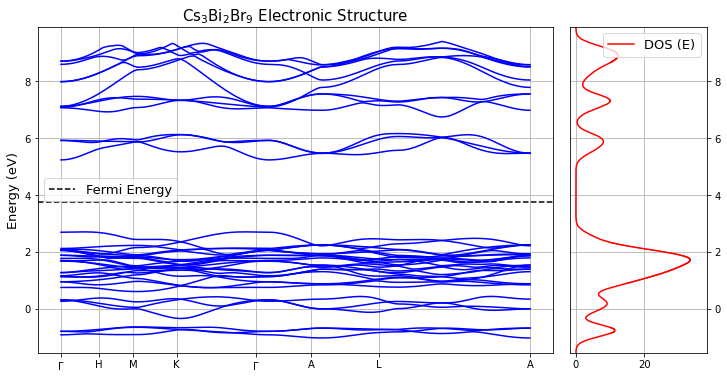

In [18]:
nbnd = len(bandas.keys())-1
k_nodes = [indices[0], indices[19], indices[38], indices[57], indices[76], indices[95], indices[10],indices[-1]]  

fig, (ax, ax_dos) = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [3, 0.8]})

for i in range(33,nbnd):
    ax.plot(bandas['k'], bandas['e'+str(i)], c = 'blue', linewidth = 1.5)
    
#ax.plot(bandas['k'], bandas['e59'], c = 'red', linewidth = 1.5) #Valence band
#ax.plot(bandas['k'], bandas['e60'], c = 'red', linewidth = 1.5) # conduction band
# Band Gap:
bg = min(bandas['e60'])- max(bandas['e59'])
print('Band Gap =', bg, 'eV')

ax.set_xticks(k_nodes)
ax.set_xticklabels(["$\Gamma$","M","K", "$\Gamma$", 'A', 'L', 'H', 'A'])
ax.grid('--')
ax.set_title(r'Cs$_3$Bi$_2$Br$_9$ Electronic Structure', fontsize = 15)
ax.axhline(3.7572, linestyle = '--', color = '0', label = 'Fermi Energy')
ax.legend(loc = 'center left', fontsize = 13)
ax.set_ylabel('Energy (eV)', fontsize = 13)


ax_dos.plot(DOS, E, color='red', linewidth=1.5, label='DOS (E)')
ax_dos.yaxis.set_label_position("right")
ax_dos.set_ylim(ax.get_ylim())  
ax_dos.legend(loc='upper right', fontsize = 13)
ax_dos.grid('--')
ax_dos.yaxis.tick_right()
fig.subplots_adjust(wspace=0.05) 
plt.savefig(r'Cs3Bi2Br9/banda_Cs3Bi2Br9.png', dpi = 200)